In [2]:
!kaggle datasets download -d viveksharmar/flight-price-data

Dataset URL: https://www.kaggle.com/datasets/viveksharmar/flight-price-data
License(s): MIT
  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 50.3MB/s]


In [3]:
import zipfile as zf
zf = zf.ZipFile('flight-price-data.zip')
zf.extractall()
zf.close()

In [4]:
import csv
csv_file = open('flight_dataset.csv')
csv_reader = csv.DictReader(csv_file)
csv_reader.fieldnames

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_hours',
 'Dep_min',
 'Arrival_hours',
 'Arrival_min',
 'Duration_hours',
 'Duration_min']

In [5]:
flight_data = []
for row in csv_reader:
  flight_data.append(row)

In [6]:
import pandas as pd
df = pd.DataFrame(flight_data)

In [7]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [8]:
import random
random.seed(42)

In [17]:
random_index = random.randint(0, len(df) - 1)
df.iloc[random_index]

Airline           Air India
Source               Mumbai
Destination       Hyderabad
Total_Stops               2
Price                 22619
Date                      6
Month                     3
Year                   2019
Dep_hours                 9
Dep_min                  40
Arrival_hours            23
Arrival_min              45
Duration_hours           14
Duration_min              5
Name: 1824, dtype: object

<Axes: >

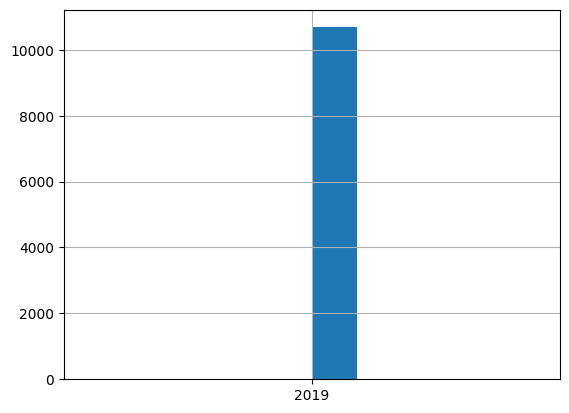

In [10]:
df["Year"].hist()

In [11]:
#80% of data fro training
#20% of data for testing
train_test_split = int(len(df) * .8)
train_test_split

8546

In [12]:
len(df)

10683

In [14]:
# x_train: data the mdoel will train on
# y_train: the labels of data that the model train on
# y_train[0] -> x_train[0]

X_train, y_train = df.drop('Price', axis=1)[:train_test_split], df['Price'][:train_test_split]
X_test, y_test = df.drop('Price', axis=1)[train_test_split:],df['Price'][train_test_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(8546, 8546, 2137, 2137)

+, -, x, /

AirIndia, IndiaGo, IndiaAirline

Airline ->AirIndia->[1,0,0]



In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), ["Date", "Month", "Year", "Dep_hours", "Dep_min", "Arrival_hours", "Arrival_min", "Duration_hours", "Duration_min"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Destination", "Source", "Airline"])
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
X_train_normal

array([[0.88461538, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30769231, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30769231, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88461538, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53846154, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
import numpy as np

y_train = np.array(y_train, dtype=np.float32)

In [37]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
], name="flight_price_model")

model.compile(loss=tf.keras.losses.mae, #loss funciton: It quantifies the difference between a model's predicted outputs and the actual target values.
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["mae"])

model_history = model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
268/268 [==============================] - 2s 2ms/step - loss: 5323.4551 - mae: 5323.4551
Epoch 2/100
268/268 [==============================] - 1s 2ms/step - loss: 2383.8037 - mae: 2383.8037
Epoch 3/100
268/268 [==============================] - 1s 2ms/step - loss: 2193.4321 - mae: 2193.4321
Epoch 4/100
268/268 [==============================] - 1s 3ms/step - loss: 2146.9539 - mae: 2146.9539
Epoch 5/100
268/268 [==============================] - 1s 4ms/step - loss: 2115.8447 - mae: 2115.8447
Epoch 6/100
268/268 [==============================] - 1s 4ms/step - loss: 2108.5806 - mae: 2108.5806
Epoch 7/100
268/268 [==============================] - 1s 4ms/step - loss: 2098.1667 - mae: 2098.1667
Epoch 8/100
268/268 [==============================] - 1s 4ms/step - loss: 2093.9502 - mae: 2093.9502
Epoch 9/100
268/268 [==============================] - 1s 2ms/step - loss: 2092.4956 - mae: 2092.4956
Epoch 10/100
268/268 [==============================] - 1s 2ms/step - loss: 2090.6

In [38]:
y_test = np.array(y_test, dtype=np.float32)

model.evaluate(X_test_normal, y_test)

67/67 [==============================] - 0s 2ms/step - loss: 2046.4794 - mae: 2046.4794


[2046.4793701171875, 2046.4793701171875]

In [45]:
model.save("drive/Mydrive/saved_flight_prices")

In [49]:
loaded_model = tf.keras.models.load_model("drive/Mydrive/saved_flight_prices")

In [50]:
loaded_model

In [51]:
loaded_model.summary()

Model: "flight_price_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 100)               3300      
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 14557 (56.86 KB)
Trainable params: 14557 (56.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.summary()

Model: "flight_price_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 100)               3300      
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 14557 (56.86 KB)
Trainable params: 14557 (56.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
